# Intro to Python I - Carpentries 

Fictitious dataset description, copied verbatim from Carpentries:

Our imaginary colleague “Dr. Maverick” has invented a new miracle drug that promises to cure arthritis inflammation flare-ups after only 3 weeks since initially taking the medication! Naturally, we wish to see the clinical trial data, and after months of asking for the data they have finally provided us with a CSV spreadsheet containing the clinical trial data.

The CSV file contains the number of inflammation flare-ups per day for the 60 patients in the initial clinical trial, with the trial lasting 40 days. Each row corresponds to a patient, and each column corresponds to a day in the trial. Once a patient has their first inflammation flare-up they take the medication and wait a few weeks for it to take effect and reduce flare-ups.

In [1]:
# configuration of jupyter notebook to show all lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

_Standard arithmentic operations_

Can be directly run in the interface. 
Exponentiation is written as `**`

In [48]:
3+5*4

2**2
2**4

23

4

16

Types of variables include floating numbers, integers and strings.

Also, we can **_assign a value to a variable_** or **_conduct operations and assign the result to a variable_**

In [3]:
weight_kg = 60.3
patient_id = '001'
weight_lb = 2.2 * weight_kg
weight_lb
patient_id = 'inflam_' + patient_id

# call function print
print(patient_id)
print(weight_kg, weight_lb)
print(patient_id, 'weight in kilograms:', weight_kg)

# identify class of variable with type
print(type(60.3))
print(type(patient_id))

# arithmetic inside print
print('weight in pounds:', 2.2 * weight_kg)

# change the value of variable
weight_kg = 65.0
print('weight in kilograms is now:', weight_kg)

132.66

inflam_001
60.3 132.66
inflam_001 weight in kilograms: 60.3
<class 'float'>
<class 'str'>
weight in pounds: 132.66
weight in kilograms is now: 65.0


You can define multiple variables in the same line
* They will be assigned in order


In [4]:
first, second = 'Grace', 'Hopper'
third, fourth = second, first
print(third, fourth)
print(fourth)

planet = 'Earth'
apples = 5
distance = 10.5
logical = 'FALSE'

# what type of variable is it
print(type(planet))
print(type(apples))
print(type(distance))


Hopper Grace
Grace
<class 'str'>
<class 'int'>
<class 'float'>


# Analyzing tabular data 

## Loading tabular data
Numerical python, **Numpy** allows analysis of tabular data in matrices or arrays (similar to vectors in R). 


In [5]:
# load the library to the environment
import numpy

# load dataset in txt file
numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

The expression `numpy.loadtxt(...)` is a function call that asks Python to run the function loadtxt which belongs to the numpy library. **This dotted notation is used everywhere in Python:** the thing that appears before the dot contains the thing that appears after.
* We can think about the dotted notation as a whole-and-part notation `whole.part`

These data correspond to arthritis patients’ inflammation. The rows are the individual patients, and the columns are their daily inflammation measurements.

In [6]:
data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')
print(data)
print(type(data))

# type inside the array 
print(data.dtype)
# dimensions in rows x columns 
print(data.shape)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]
<class 'numpy.ndarray'>
float64
(60, 40)


**Python uses a C++ language where the first value is 0.** Other languages like R start counting from 1. The number in the array can be seen as how many steps have we taken from the initial value. 

In [7]:
print('first value in data:', data[0, 0])
print('middle value in data:', data[30, 20])

first value in data: 0.0
middle value in data: 13.0


## Slicing tabular data

We can select an interval of values using `X:X`. 

The slice 0:4 means, “Start at index 0 and go up to, but not including, index 4”. Again, the up-to-but-not-including takes a bit of getting used to, but the rule is that the difference between the upper and lower bounds is the number of values in the slice.

We can exclude the initial or last term in the interval. *Python will use 0 as default lower bound and max as default upper limit.*


In [8]:
print('first 4 rows')
print(data[0:4, 0:10])
print('first 5 rows')
print(data[0:5, 0:10])

# no lower or upper boundary
small = data[:3, 36:]
print('small is:')
print(small)


first 4 rows
[[0. 0. 1. 3. 1. 2. 4. 7. 8. 3.]
 [0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]]
first 5 rows
[[0. 0. 1. 3. 1. 2. 4. 7. 8. 3.]
 [0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]
 [0. 1. 1. 3. 3. 1. 3. 5. 2. 4.]]
small is:
[[2. 3. 0. 0.]
 [1. 1. 0. 1.]
 [2. 2. 1. 1.]]


## Analyzing data

NumPy has several useful functions that take an array as input to perform operations on its values. **If we want to find the average inflammation** for all patients on all days, for example, **we can ask NumPy to compute `data’s` mean value:**

In [9]:
numpy.mean(data)
numpy.mean(data[:3,36:])

# some functions may not have input
import time
# current time
time.ctime()

6.14875

1.1666666666666667

'Thu Sep 15 17:39:22 2022'

we can also use multiple assignment to run multiple functions and assign each result to a different variable.

In [10]:
maxval, minval, stdval = numpy.max(data), numpy.min(data), numpy.std(data)

print('maximum inflammation:', maxval)
print('minimum inflammation:', minval)
print('standard deviation:', stdval)

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.613833197118566


*If you type the name of something followed by a dot, then you can use tab completion (e.g. type numpy. and then press Tab) to see a list of all functions and attributes that you can use. 
    *After selecting one, you can also add a question mark (e.g. numpy.cumprod?), and IPython will return an explanation of the method! 
    *This is the same as doing help(numpy.cumprod). 

When analyzing data, though, we often want to look at variations in statistical values, such as the maximum inflammation per patient or the average inflammation per day. One way to do this is to create a new temporary array of the data we want, then ask it to do the calculation:


In [11]:
patient_0 = data[0, :] # 0 on the first axis (rows), everything on the second (columns)
print('maximum inflammation for patient 0:', numpy.max(patient_0))
# one liner
print('maximum inflammation for patient 2:', numpy.max(data[2, :]))

maximum inflammation for patient 0: 18.0
maximum inflammation for patient 2: 19.0


What if we need to run a function for every row or for every column. Almost all python functions let us specify the axis of operation
* __Axis = 0 runs functions per every column__, in this case the average per day
* __Axis = 1 runs functions per every row__, in this case the average per patient

In [12]:
print('evaluate the shape')
print(data.shape)

# per column
print(numpy.mean(data, axis=0))
print(numpy.mean(data, axis=0).shape)
# per row
print(numpy.mean(data, axis=1))
print(numpy.mean(data, axis=1).shape)

evaluate the shape
(60, 40)
[ 0.          0.45        1.11666667  1.75        2.43333333  3.15
  3.8         3.88333333  5.23333333  5.51666667  5.95        5.9
  8.35        7.73333333  8.36666667  9.5         9.58333333 10.63333333
 11.56666667 12.35       13.25       11.96666667 11.03333333 10.16666667
 10.          8.66666667  9.15        7.25        7.33333333  6.58333333
  6.06666667  5.95        5.11666667  3.6         3.3         3.56666667
  2.48333333  1.5         1.13333333  0.56666667]
(40,)
[5.45  5.425 6.1   5.9   5.55  6.225 5.975 6.65  6.625 6.525 6.775 5.8
 6.225 5.75  5.225 6.3   6.55  5.7   5.85  6.55  5.775 5.825 6.175 6.1
 5.8   6.425 6.05  6.025 6.175 6.55  6.175 6.35  6.725 6.125 7.075 5.725
 5.925 6.15  6.075 5.75  5.975 5.725 6.3   5.9   6.75  5.925 7.225 6.15
 5.95  6.275 5.7   6.1   6.825 5.975 6.725 5.7   6.25  6.4   7.05  5.9  ]
(60,)


A section of an array is called a slice. We can take slices of character strings as well using the index of data.


In [13]:
element = 'oxygen'
print('first three characters:', element[0:3])
print('last three characters:', element[3:6])

# What is the value of element[:4]? What about element[4:]? Or element[:]?
print(element[4:])
print(element[:])

# What is element[-1]? What is element[-2]?
element[-1]
element[-2]

# specify a string range that applies even if we change the variable element
element = 'oxygen'
print('last three characters:', element[-3:])
element = 'carpentry'
print('last three characters:', element[-3:])
element = 'clone'
print('last three characters:', element[-3:])
element = 'hi'
print('last three characters:', element[+1:])


data[3:3, 4:4]
data[3:3, :]


first three characters: oxy
last three characters: gen
en
oxygen


'n'

'e'

last three characters: gen
last three characters: try
last three characters: one
last three characters: i


array([], shape=(0, 0), dtype=float64)

array([], shape=(0, 40), dtype=float64)

Arrays can be concatenated and stacked on top of one another, using NumPy’s `vstack` and `hstack` functions for vertical and horizontal stacking, respectively.

In [14]:
import numpy

A = numpy.array([[1,2,3], [4,5,6], [7, 8, 9]])
print('A = ')
print(A)

B = numpy.hstack([A, A])
print('B = ')
print(B)

C = numpy.vstack([A, A])
print('C = ')
print(C)

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
B = 
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]]
C = 
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]]


Write some additional code that slices the first and last columns of A, and stacks them into a 3x2 array. Make sure to print the results to verify your solution.

* Convoluted: we can subset the array, we have to put a range for every column or pyhton will collapse it to a single dimension. Then, stack the arrays. 

In [15]:
# convoluted way 
D=numpy.hstack([A[:,:1], A[:,-1:]])
print("Array D: \n", D)
#help(numpy.vstack)
print('Stacked array: \n',
      numpy.vstack((D,D)))

Array D: 
 [[1 3]
 [4 6]
 [7 9]]
Stacked array: 
 [[1 3]
 [4 6]
 [7 9]
 [1 3]
 [4 6]
 [7 9]]


The `numpy.diff()` function takes an array and returns the differences between two successive values. Let’s use it to examine the changes each day across the first week of patient 3 from our inflammation dataset.

In [16]:
patient3_week1 = data[3,:7]
print(patient3_week1)

# across days for all patients
print(numpy.diff(data, axis=1))

# maximum difference in inflammation score for a patient in a day
print('dimesions of data:', data.shape)
numpy.max(numpy.diff(data, axis=1), axis=1)

[0. 0. 2. 0. 4. 2. 2.]
[[ 0.  1.  2. ...  1. -3.  0.]
 [ 1.  1. -1. ...  0. -1.  1.]
 [ 1.  0.  2. ...  0. -1.  0.]
 ...
 [ 1.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  1. ... -2.  2. -2.]
 [ 0.  1. -1. ... -2.  0. -1.]]
dimesions of data: (60, 40)


array([ 7., 12., 11., 10., 11., 13., 10.,  8., 10., 10.,  7.,  7., 13.,
        7., 10., 10.,  8., 10.,  9., 10., 13.,  7., 12.,  9., 12., 11.,
       10., 10.,  7., 10., 11., 10.,  8., 11., 12., 10.,  9., 10., 13.,
       10.,  7.,  7., 10., 13., 12.,  8.,  8., 10., 10.,  9.,  8., 13.,
       10.,  7., 10.,  8., 12., 10.,  7., 12.])

# Visualization of data

`matplotlib` is the standard library used for ploting in Python. It can easily generate a heatmap

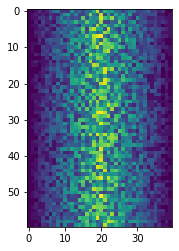

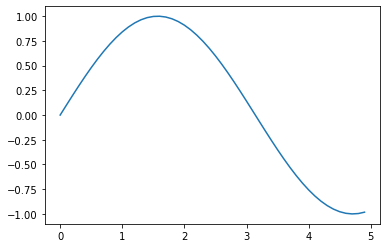

In [17]:
import matplotlib.pyplot
image = matplotlib.pyplot.imshow(data)
matplotlib.pyplot.show()

x = numpy.arange(0, 5, 0.1)
y = numpy.sin(x)
matplotlib.pyplot.plot(x, y)

Plot of the avergae value per day


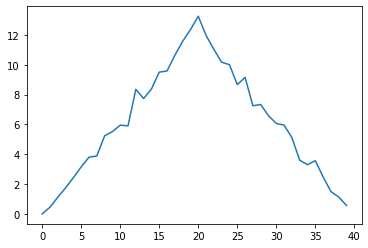

Plot of the maximum value per day


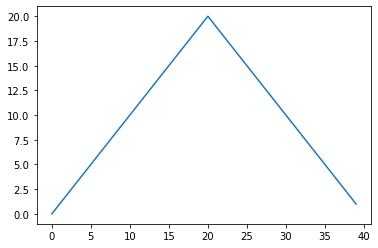

Plot of the minimum value per day


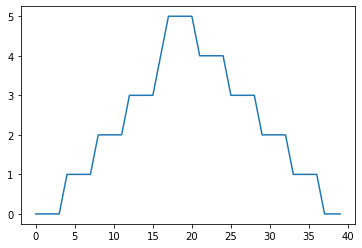

In [18]:
# average inflammation over time plot 
ave_inflammation = numpy.mean(data, axis=0) # axis=0 calculates row-wise, average of each day
print('Plot of the avergae value per day')
ave_plot = matplotlib.pyplot.plot(ave_inflammation)
matplotlib.pyplot.show()

print('Plot of the maximum value per day')
max_plot = matplotlib.pyplot.plot(numpy.max(data, axis=0))
matplotlib.pyplot.show()

print('Plot of the minimum value per day')
min_plot = matplotlib.pyplot.plot(numpy.min(data, axis=0))
matplotlib.pyplot.show()

The results of both min and max values per day seem to convenient, a straight line with peak around week 3 and a graph with a ladder with a similar peak around week 3 respectively. 

### Grouping plots

`matplotlib.pyplot.figure()` creates a space into which we will place all of our plots. 
* The parameter figsize tells Python how big to make this space (width, height). 
* Each subplot is placed into the figure using its `add_subplot` method. 
    * The first parameter denotes how many total rows of subplots there are
    * the second  refers to the total number of subplot columns
    * the final parameter denotes which subplot your variable is referencing (left-to-right, top-to-bottom). 
* Each subplot is stored in a different variable (axes1, axes2, axes3). 
    * Once a subplot is created, the axes can be titled using the `set_xlabel()` command (or `set_ylabel()`). 

Text(0, 0.5, 'average')

Text(0, 0.5, 'maximum')

Text(0, 0.5, 'minimum')

(0.0, 5.5)

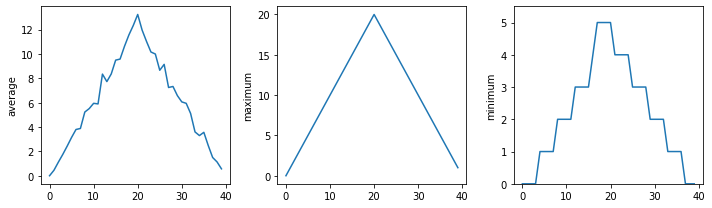

In [19]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')
fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

# define a name for each subplot
axes1 = fig.add_subplot(1, 3, 1) # fig.add_subplot(nrows, ncols, index)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

# set a Y-axis label for the first space and plot average
axes1.set_ylabel('average')
axes1.plot(numpy.mean(data, axis=0))

axes2.set_ylabel('maximum')
axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('minimum')
axes3.plot(numpy.min(data, axis=0))

# automatically set a ploting axes limit
min_data=numpy.min(data, axis=0)
axes3.set_ylim(numpy.min(min_data), (numpy.max(min_data) * 1.1))

# adjust the padding of the figure space
fig.tight_layout()

# save as a graphic file
matplotlib.pyplot.savefig('inflammation.png')
matplotlib.pyplot.show()

### Using alias when importing libraries

In this lesson we use the import `matplotlib.pyplot` syntax to import the pyplot module of **matplotlib**. However, shortcuts such as `import matplotlib.pyplot as plt` are frequently used. Importing pyplot this way means that after the initial import, rather than writing `matplotlib.pyplot.plot(...)`, you can now write `plt.plot(...)`. Another common convention is to use the shortcut `import numpy as np` when importing the **NumPy** library. We then can write `np.loadtxt(...)` instead of `numpy.loadtxt(...)`, for example.


### Exercises

Text(0, 0.5, 'average')

Text(0, 0.5, 'max')

Text(0, 0.5, 'min')

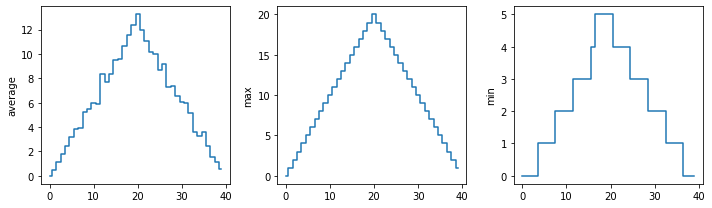

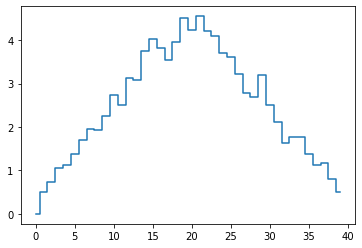

Text(0, 0.5, 'average')

Text(0, 0.5, 'max')

Text(0, 0.5, 'min')

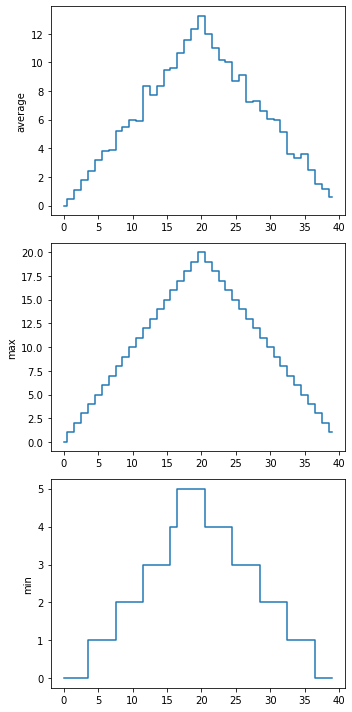

In [20]:
# change the drawing stile of the lines for the previous plots

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(fname='inflammation-01.csv', delimiter=',')

fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(numpy.mean(data, axis=0), drawstyle='steps-mid')

axes2.set_ylabel('max')
axes2.plot(numpy.max(data, axis=0), drawstyle='steps-mid')

axes3.set_ylabel('min')
axes3.plot(numpy.min(data, axis=0), drawstyle='steps-mid')

fig.tight_layout()

matplotlib.pyplot.show()

# Create a plot showing the standard deviation (numpy.std) of the inflammation data for each day across all patients.

data_sd=np.std(data, axis=0)
image=plt.plot(data_sd, ds='steps-mid')
plt.show()

# show the plots on top of each other

fig = plt.figure(figsize=(5.0, 10.0))

axes1 = fig.add_subplot(3, 1, 1)
axes2 = fig.add_subplot(3, 1, 2)
axes3 = fig.add_subplot(3, 1, 3)

axes1.set_ylabel('average')
axes1.plot(numpy.mean(data, axis=0), drawstyle='steps-mid')

axes2.set_ylabel('max')
axes2.plot(numpy.max(data, axis=0), drawstyle='steps-mid')

axes3.set_ylabel('min')
axes3.plot(numpy.min(data, axis=0), drawstyle='steps-mid')

fig.tight_layout()

matplotlib.pyplot.show()

# Storing multiple values in a list

A list is a way of storing multiple values together. In this tutorial, we have 11 more files representing clinical trial data about an intervention for inflammation in AR. 

Lists are built-in to python and do not require additional libraries. 
We can use indexes to access the contents of a list, the first value is 0.

In [21]:
odds = [1,3,5,7]
print('Odds are:', odds)

# using indexes
print('first element:', odds[0])
print('second element:', odds[1])
print('second to last element:',odds[-2])

# different from strings, the values in a list can be changed
names = ['Curie', 'Darwing', 'Turing']  # typo in Darwin's name
print('names is originally:', names)
names[1] = 'Darwin'  # correct the name
print('final value of names:', names)

Odds are: [1, 3, 5, 7]
first element: 1
second element: 3
second to last element: 5
names is originally: ['Curie', 'Darwing', 'Turing']
final value of names: ['Curie', 'Darwin', 'Turing']


### Modifying data in place

Lists and arrays can be modified after creation. We can change individual elements, append new elements, or reorder the whole list. 

For some operations, like sorting, we can choose whether to use a function that modifies the data in-place or a function that returns a modified copy and leaves the original unchanged.

_Be careful when modifying data in-place. If two variables refer to the same list, and you modify the list value, it will change for both variables!_

In [22]:
# when two objects point to the *same* list
salsa = ['peppers','onions','cilantro']
my_salsa = salsa
salsa[0] = 'hot peppers'
print('my salsa contains:', my_salsa)

# an independent list must make a copy of the values
salsa = ['peppers','onions','cilantro']
my_salsa = list(salsa)
salsa[0] = 'hot peppers'
print('my salsa contains:', my_salsa)


my salsa contains: ['hot peppers', 'onions', 'cilantro']
my salsa contains: ['peppers', 'onions', 'cilantro']


In [23]:
# nested list
x = [['pepper', 'zucchini', 'onion'],
     ['cabbage', 'lettuce', 'garlic'],
     ['apple', 'pear', 'banana']]
print(x[0])
print(x[1], [x[0]])
# second element of first list nested in X
print(x[0][2])

# heterogeneous list
sample_ages = [10, 12.5, 'Unknown']
print(sample_ages)
type(sample_ages)

# lists can be modified in several ways
sample_ages.append(11)
print('ages after adding a value:', sample_ages)
sample_ages.pop(0)
print('ages after removing a value:', sample_ages)
sample_ages.reverse()
print('ages reversed:', sample_ages)
# all these methods modify in place


['pepper', 'zucchini', 'onion']
['cabbage', 'lettuce', 'garlic'] [['pepper', 'zucchini', 'onion']]
onion
[10, 12.5, 'Unknown']


list

ages after adding a value: [10, 12.5, 'Unknown', 11]


10

ages after removing a value: [12.5, 'Unknown', 11]
ages reversed: [11, 'Unknown', 12.5]


Lists can be accessed in a similar way to Numpy arrays by using brackets `[]` and coordinates

In [24]:
# slicing a string
binomial_name = 'Drosophila melanogaster'
genus = binomial_name[0:10]
print('genus:', genus)
species = binomial_name[11:23]
print('species:', species)

# slicing a list
chromosomes = ['X', 'Y', '2', '3', '4']
autosomes = chromosomes[2:5]
print('autosomes:', autosomes)
last = chromosomes[-1]
print('last:', last)

genus: Drosophila
species: melanogaster
autosomes: ['2', '3', '4']
last: 4


#### Slicing exercises

Use slicing to access only the last four characters of a string or entries of a list.

Would your solution work regardless of whether you knew beforehand the length of the string or list (e.g. if you wanted to apply the solution to a set of lists of different lengths)? If not, try to change your approach to make it more robust.

Hint: Remember that indices can be negative as well as positive

In [25]:
string_for_slicing = 'Observation date: 02-Feb-2013'
list_for_slicing = [['fluorine', 'F'],
                    ['chlorine', 'Cl'],
                    ['bromine', 'Br'],
                    ['iodine', 'I'],
                    ['astatine', 'At']]

# slice solution
string_for_slicing[-4:]
list_for_slicing [-4:]

'2013'

[['chlorine', 'Cl'], ['bromine', 'Br'], ['iodine', 'I'], ['astatine', 'At']]

If we want to take a subset of entries that aren’t next to each other in the sequence? 
You can add a third argument to the range within the brackets, called the step size. 

- __The begining or ending of a slice can be ommitted__.
- The function `len()` can be used to know the length of a variable

In [26]:
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]
print('primes object:', primes)
subset = primes[0:12:3]
print('subset starting at 1st value', subset)
# slice begings at first entry in brackets

primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]
subset = primes[2:12:3]
print('subset starting at 2nd value', subset)

# Use the step size argument to create a new string that contains only every other character in the string “In an octopus’s garden in the shade”. Start with creating a variable to hold the string:

beatles = "In an octopus's garden in the shade"
# What slice of beatles will produce the following output (i.e., the first character, third character, and every other character through the end of the string)?
beatles[0:40:2]
beatles[::2]

len(beatles)


primes object: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]
subset starting at 1st value [2, 7, 17, 29]
subset starting at 2nd value [5, 13, 23, 37]


'I notpssgre ntesae'

'I notpssgre ntesae'

35

#### Notes

The multiplication operator `*` used on a list replicates elements of the list and concatenates them together:

In [27]:
counts = [2, 4, 6, 8, 10]
repeats = counts * 2
print(repeats)

[2, 4, 6, 8, 10, 2, 4, 6, 8, 10]


# Repeating actions with loops

Different ways of repeating the same command. For example, printing the contents of a list

Repeating the same command multiple time has its issues:

- Not scalable. Imagine you need to print a list that has hundreds of elements. 
- Difficult to maintain. To modify something in the command for all values, we would have to modify every command. 
- Fragile. It may not apply to all elements of a list, just to the number of commands used. If used in a list shorter than the number of commands, it will produce an error. 

In [4]:
odds= [1,3,5,7,9,11]
print(odds[0])
print(odds[1])
print(odds[2])
print(odds[3])

# error
odds = [1, 3, 5]
#print(odds[3])

1
3
5
7


A for loop repeats an operation for every value in a list or range. It is adaptable no matter the length of the variable.

__Important note for writing for loops in python:__

1. start line is written as "for **_var_** in **_collection_**"
2. There must be a colon `:` at the end of the line starting the loop
2. We must indent anything we want to run inside the loop. 
3. Unlike many other languages, there is no command to signify the end of the loop body (e.g. end for)
    - what is indented after the starting line belongs to the loop.
    
![](https://swcarpentry.github.io/python-novice-inflammation/fig/05-loops_image_num.png)

In [6]:
odds = [1, 3, 5, 7]
for num in odds:
    print(num)
    
odds = [1, 3, 5, 7, 9 , 11 ,13]
for num in odds:
    print(num)
    
# changing the name of loop variable
odds = [1, 3, 5, 7, 9 , 11 ,13]
for apples in odds:
    print (apples)
    print(num)

# every iteration adds 1 to the length variable
length = 0
names = ['Curie', 'Darwin', 'Turing']
for value in names:
    length = length + 1
    print('There are', length, 'names in the list.')

1
3
5
7
1
3
5
7
9
11
13
1
13
3
13
5
13
7
13
9
13
11
13
13
13
There are 1 names in the list.
There are 2 names in the list.
There are 3 names in the list.


#### Range function

Produces a sequence of numbers, according to 1, 2 or 3 parameters:
- Single parameter, sequence of that length starting from 0 and incrementing by 1
- Two parameters, starts at the first and finishes at the last, incrementing by 1
- Three parameters, starts at first, finishes at second, increments by third

#### Exercises

In [ ]:
# Write a loop that calculates the same result as 5 ** 3 using multiplication (and without exponentiation).

In [20]:
five = 5
for num in range(0,2):
    five = five * 5
print(five)

# single parameter
five = 5
for num in range(2):
    five = five * 5
print(five)

125
125


The built-in function enumerate takes a sequence (e.g. a list) and generates a new sequence of the same length. Each element of the new sequence is a pair composed of the index (0, 1, 2,…) and the value from the original sequence:

In [69]:
#for idx, val in enumerate(a_list):
    # Do something using idx and val

The code above loops through `a_list`, assigning the index to `idx` and the value to `val`.

Suppose you have encoded a polynomial as a list of coefficients in the following way: 
- The first element is the constant term
- The second element is the coefficient of the linear term
- The third is the coefficient of the quadratic term, etc.

Write a loop using enumerate(coefs) which computes the value y of any polynomial, given x and coefs.
- To evaluate exponentials, we use `**`

In [27]:
x = 5
coefs = [2, 4, 3]
y = coefs[0] * x**0 + coefs[1] * x**1 + coefs[2] * x**2
print(y)

y = 0
for idx, coef in enumerate(coefs):
    print("index=", idx) # exponential given by enumerate
    print("constant=", coef) # constant for each exponential given by coef
    y = y + coef * x**idx
    print("y=", y)

97
index= 0
constant= 2
y= 2
index= 1
constant= 4
y= 22
index= 2
constant= 3
y= 97


## Analyzing Data from Multiple Files

We can use the `glob` library contains and its function `glob` to find files and directories whose names match a pattern. 
- Similar to `find` or `ls` in the command line
- Pattern is supplied similar to a regular expression
    - the character * matches zero or more characters, while ? matches any one character.

In [45]:
import glob

help(glob.glob)
glob.glob(pathname="inflammation*csv")

Help on function glob in module glob:

glob(pathname, *, recursive=False)
    Return a list of paths matching a pathname pattern.
    
    The pattern may contain simple shell-style wildcards a la
    fnmatch. However, unlike fnmatch, filenames starting with a
    dot are special cases that are not matched by '*' and '?'
    patterns.
    
    If recursive is true, the pattern '**' will match any files and
    zero or more directories and subdirectories.



['inflammation-05.csv',
 'inflammation-11.csv',
 'inflammation-10.csv',
 'inflammation-04.csv',
 'inflammation-12.csv',
 'inflammation-06.csv',
 'inflammation-07.csv',
 'inflammation-03.csv',
 'inflammation-02.csv',
 'inflammation-01.csv',
 'inflammation-09.csv',
 'inflammation-08.csv']

We will loop over each inflammation dataset and produce a summary plot. As an example we will use only the first three datasets.



Dataset= inflammation-01.csv


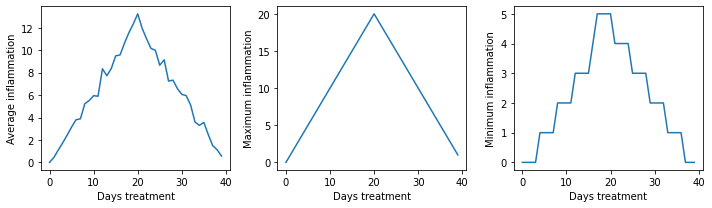

Dataset= inflammation-02.csv


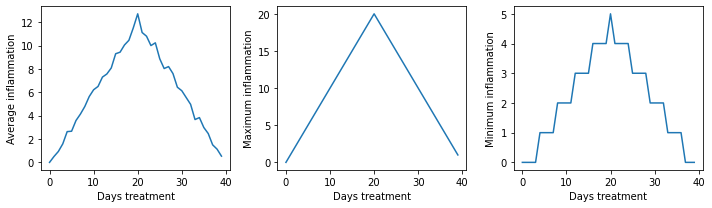

Dataset= inflammation-03.csv


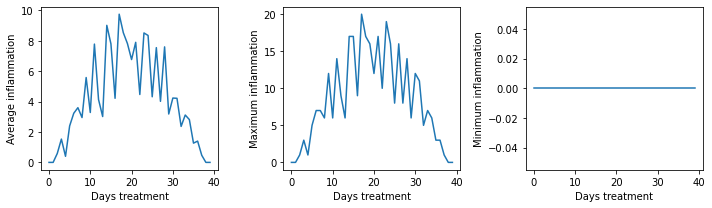

Dataset= inflammation-04.csv


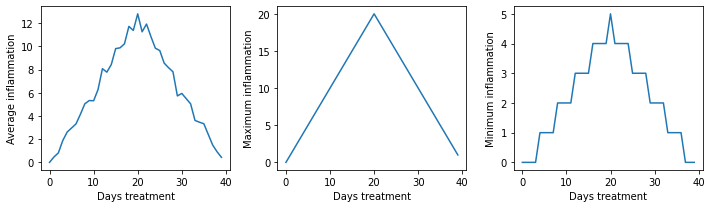

Dataset= inflammation-05.csv


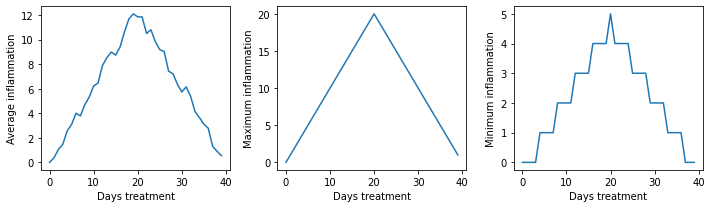

Dataset= inflammation-06.csv


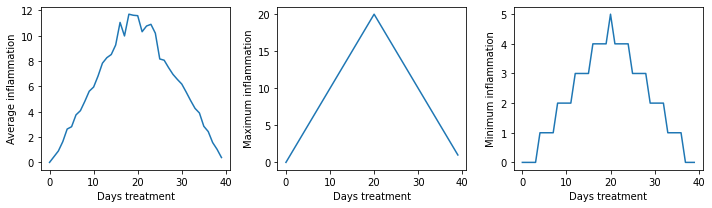

Dataset= inflammation-07.csv


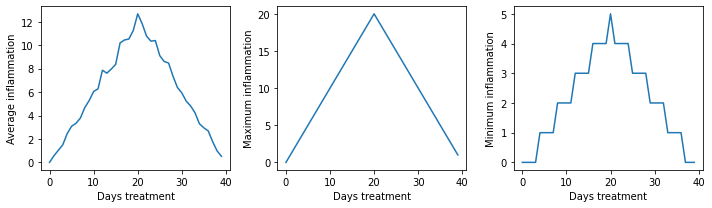

Dataset= inflammation-08.csv


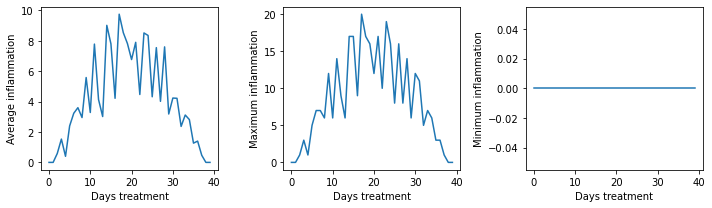

In [126]:
import glob, numpy, matplotlib.pyplot

# sorted generates a sorted list
filenames= sorted(glob.glob("inflammation*"))
filenames = filenames[0:8]
# print(filenames)

for filename in filenames:
    print("Dataset=", filename)
    
    data = numpy.loadtxt(fname=filename, delimiter=',')
    
    fig = matplotlib.pyplot.figure(figsize=(10, 3))
    
    # add_subplot defines name of subplot according to (nrows, ncols, index)
    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    axes1.set_ylabel('Average inflammation')
    axes1.set_xlabel('Days treatment')
    axes1.plot(numpy.mean(data, axis=0)) # axis=0 per column operation
    
    axes2.set_ylabel('Maximum inflammation')
    axes2.set_xlabel('Days treatment')
    axes2.plot(numpy.max(data, axis=0)) # axis=0 per column operation
    
    axes3.set_ylabel('Minimum inflammation')
    axes3.set_xlabel('Days treatment')
    axes3.plot(numpy.min(data, axis=0)) # axis=0 per column operation
    
    fig.tight_layout()
    matplotlib.pyplot.show()

The plots look suspicious as the two first lines share the same patterns for all plots, while the last one has 0 as the minimum value consistently across all days.

#### Exercise

__Exercise 1:__ Plot the difference between the average inflammations reported in the first and second datasets (stored in `inflammation-01.csv` and `inflammation-02.csv`, correspondingly), i.e., the difference between the leftmost plots of the first two figures.

['inflammation-01.csv', 'inflammation-02.csv']


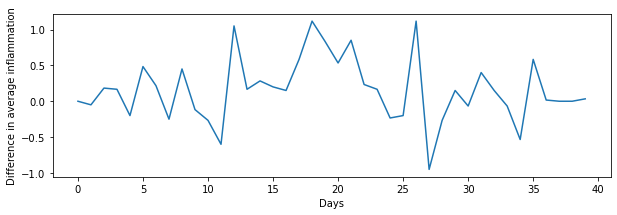

In [90]:
# sorted generates a sorted list
filenames= sorted(glob.glob("inflammation*"))
print(filenames[0:2])

data0= numpy.loadtxt(fname=filenames[0], delimiter=',')
# print(data0[:3,:3])
data1= numpy.loadtxt(fname=filenames[1], delimiter=',')
# print(data1[:3,:3])

matplotlib.pyplot.figure(figsize=(10, 3))
matplotlib.pyplot.ylabel("Difference in average inflammation")
matplotlib.pyplot.xlabel("Days")
matplotlib.pyplot.plot(numpy.mean(data0, axis=0) - numpy.mean(data1, axis=0))

fig.tight_layout()
matplotlib.pyplot.show()

__Exercise 2:__ Use each of the files once to generate a dataset containing values averaged over all patients:

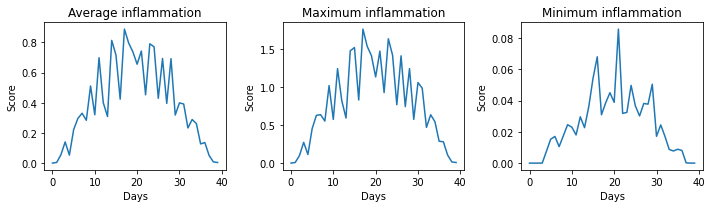

In [124]:
filenames = glob.glob('inflammation*.csv')
composite_data = numpy.zeros((60,40))

for filename in filenames:
    data = numpy.loadtxt(fname = filename, delimiter=',')
    # matrix addition, final [0,0] is the result of adding [0,0] from both arrays
    composite_data = composite_data + data
    # divides by 12 to get average of all datasets
    composite_data = composite_data / len(filenames)
    # print(composite_data)

fig = matplotlib.pyplot.figure(figsize=(10, 3))

axes1=fig.add_subplot(1,3,1)
axes2=fig.add_subplot(1,3,2)
axes3=fig.add_subplot(1,3,3)

axes1.set_ylabel("Score")
axes1.set_xlabel("Days")
axes1.set_title("Average inflammation")
axes1.plot(numpy.mean(composite_data, axis=0))

axes2.set_ylabel("Score")
axes2.set_xlabel("Days")
axes2.set_title("Maximum inflammation")
axes2.plot(numpy.max(composite_data, axis=0))

axes3.set_ylabel("Score")
axes3.set_xlabel("Days")
axes3.set_title("Minimum inflammation")
axes3.plot(numpy.min(composite_data, axis=0))

fig.tight_layout()
matplotlib.pyplot.show()

#### Analysis summary

Seems like the analysis of inflammation scores has some suspicious findings. Particularly perfectly agreeing with the reported findings of  :
- Some datasets seem to be oddly similar to each other when plotting (set 3 and set 8)
- The distribution of minimum values is also pretty similar among most of the studies

__Note from the course:__ _Dr. Maverick confesses that they fabricated the clinical data after they found out that the initial trial suffered from a number of issues, including unreliable data-recording and poor participant selection. They created fake data to prove their drug worked, and when we asked for more data they tried to generate more fake datasets, as well as throwing in the original poor-quality dataset a few times to try and make all the trials seem a bit more “realistic”._